Importing Dependencies

In [88]:
#basic libraries

import numpy as np
import pandas as pd

#Visualization Libraries
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

Importing data to pandas dataframe

In [89]:
mental_health=pd.read_csv('/content/Mental Health Data.zip')
mental_health.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [90]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [91]:
mental_health.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [92]:
mental_health['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [93]:
mental_health['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

In [94]:
mental_health.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

Data Preparation & Performing Feature Engineering

In [95]:
mental_health['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [96]:
mental_health = mental_health[(mental_health['Age'] >= 0) & (mental_health['Age'] <= 100)]
mental_health['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [97]:
mental_health['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [98]:
mental_health['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)','Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

mental_health['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)','woman',], 'Female', inplace = True)

mental_health["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
'Agender', 'A little about you', 'Nah', 'All',
'ostensibly male, unsure what that really means',
'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?','Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

mental_health['Gender'].value_counts()

Male      988
Female    247
Other      19
Name: Gender, dtype: int64

Data Visualization

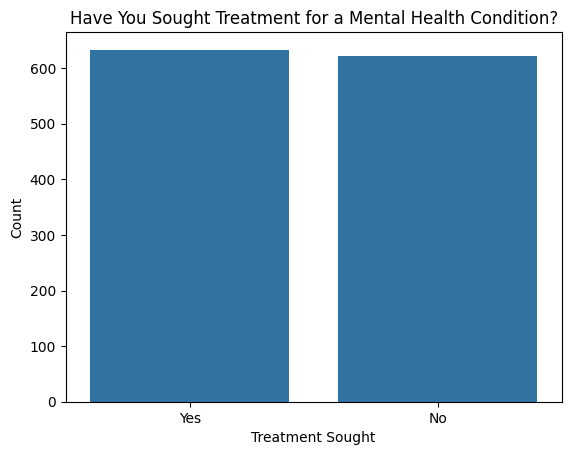

In [99]:
# Create a countplot
sns.countplot(x='treatment', data=mental_health)

# Customize the plot
plt.title('Have You Sought Treatment for a Mental Health Condition?')
plt.xlabel('Treatment Sought')
plt.ylabel('Count')

# Show the plot
plt.show()

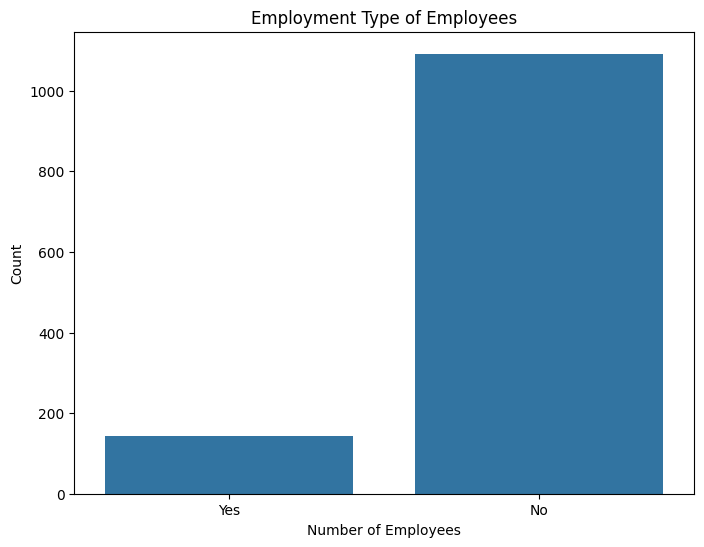

In [100]:
# Employemnt type of the employees
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='self_employed', data=mental_health)

# Customize the plot
plt.title('Employment Type of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Count')

# Show the plot
plt.show()

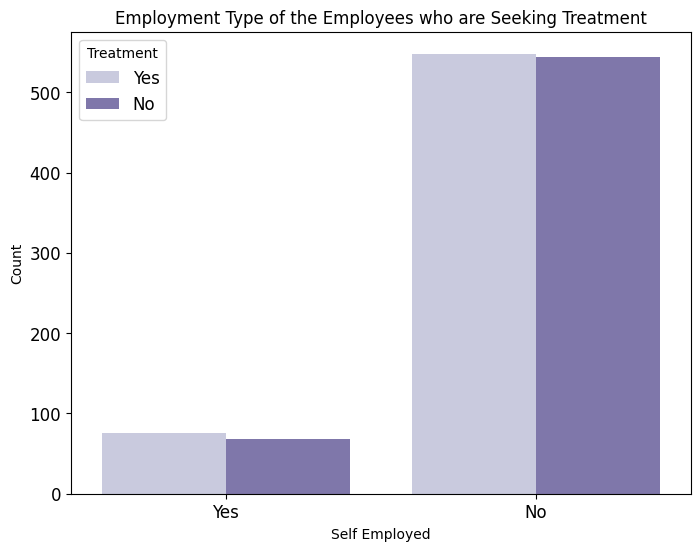

In [101]:
plt.figure(figsize=(8, 6))
sns.countplot(x='self_employed', hue='treatment', data=mental_health, palette='Purples')

plt.title('Employment Type of the Employees who are Seeking Treatment', fontsize=12)
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Treatment', fontsize=12)

plt.show()

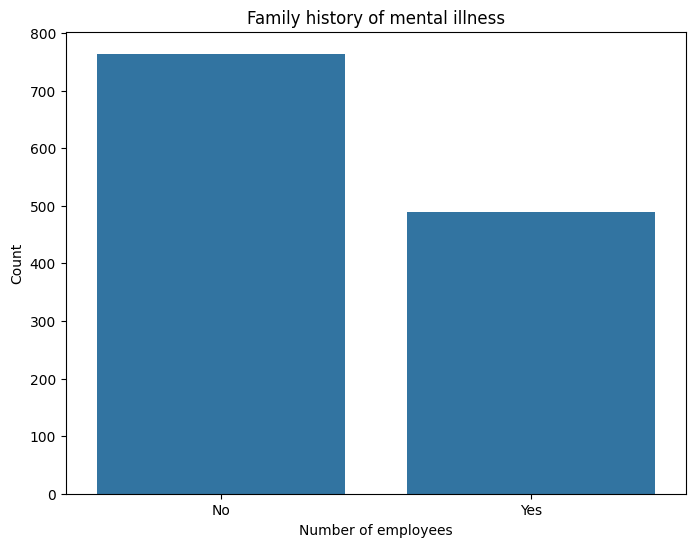

In [102]:
#Family History of Mental Illness
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history', data=mental_health)

# Customize the plot
plt.title('Family history of mental illness')
plt.xlabel('Number of employees')
plt.ylabel('Count')

# Show the plot
plt.show()

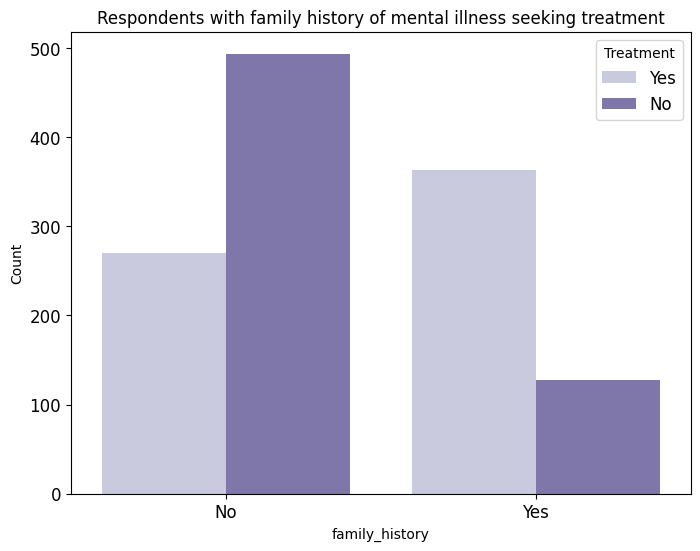

In [103]:
#Respondents with family history of mental illness seeking treatment
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history', hue='treatment', data=mental_health, palette='Purples')

plt.title('Respondents with family history of mental illness seeking treatment', fontsize=12)
plt.xlabel('family_history')
plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Treatment', fontsize=12)

plt.show()

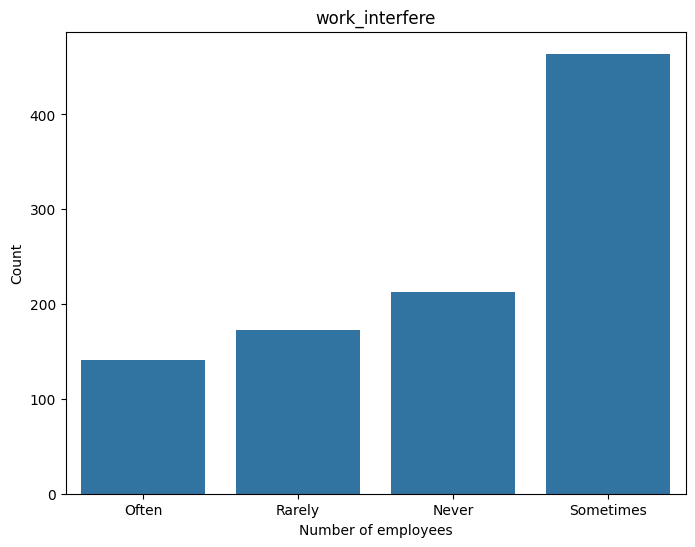

In [104]:
#Work_interfere Question: 'If you have a mental health condition, do you feel that it interferes with your work?'.
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='work_interfere', data=mental_health)

# Customize the plot
plt.title('work_interfere')
plt.xlabel('Number of employees')
plt.ylabel('Count')

# Show the plot
plt.show()

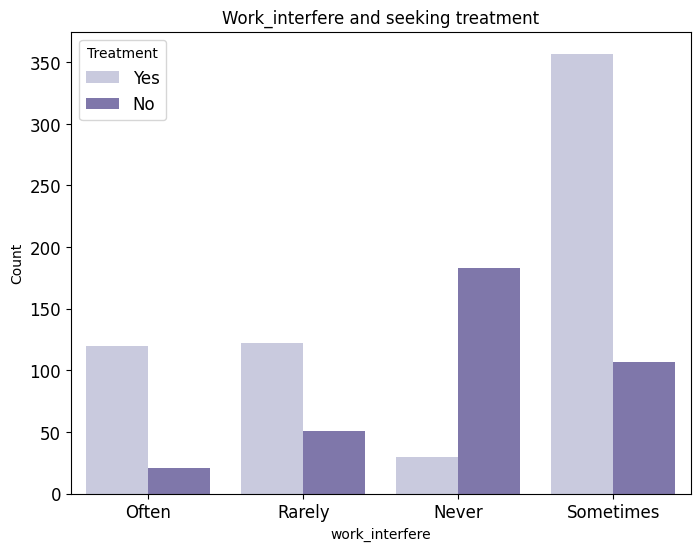

In [105]:
#Work_interfere and seeking treatment
plt.figure(figsize=(8, 6))
sns.countplot(x='work_interfere', hue='treatment', data=mental_health, palette='Purples')

plt.title('Work_interfere and seeking treatment', fontsize=12)
plt.xlabel('work_interfere')
plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Treatment', fontsize=12)

plt.show()

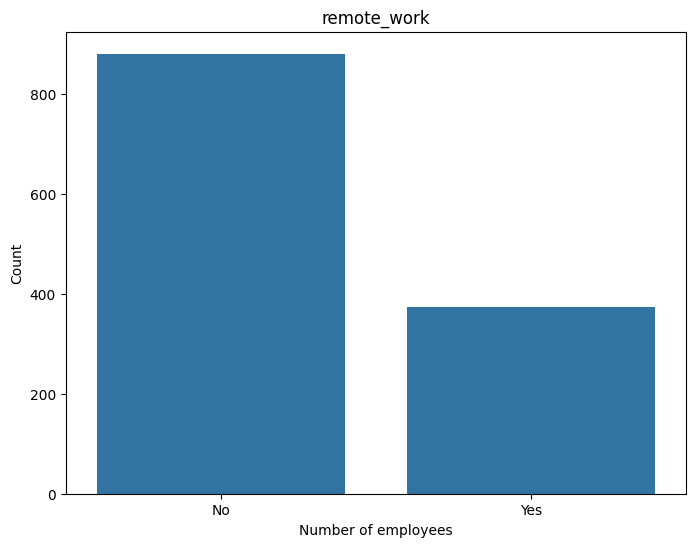

In [106]:
#Working type of respondents: 'Do you work remotely (outside of an office) at least 50% of the time?
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='remote_work', data=mental_health)

# Customize the plot
plt.title('remote_work')
plt.xlabel('Number of employees')
plt.ylabel('Count')

# Show the plot
plt.show()

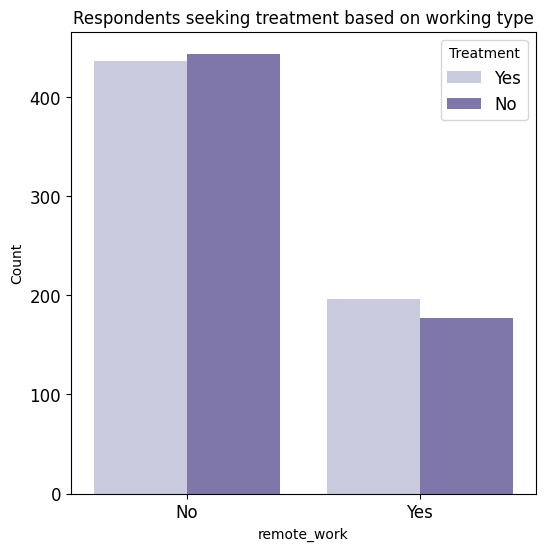

In [107]:
#Respondents seeking treatment based on working type
plt.figure(figsize=(6, 6))
sns.countplot(x='remote_work', hue='treatment', data=mental_health, palette='Purples')

plt.title('Respondents seeking treatment based on working type', fontsize=12)
plt.xlabel('remote_work')
plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Treatment', fontsize=12)

plt.show()

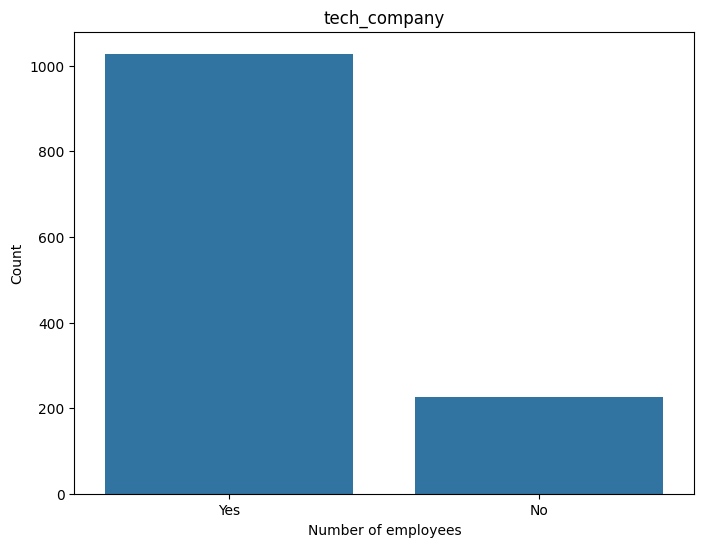

In [108]:
#Company category of respondents: 'Is your employer primarily a tech company/organization?
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='tech_company', data=mental_health)

# Customize the plot
plt.title('tech_company')
plt.xlabel('Number of employees')
plt.ylabel('Count')

# Show the plot
plt.show()

Data preparation

In [109]:
mental_health.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               263
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [110]:
mental_health['work_interfere'].value_counts()

Sometimes    464
Never        213
Rarely       173
Often        141
Name: work_interfere, dtype: int64

In [111]:
mental_health['work_interfere'] = mental_health['work_interfere'].fillna("Don't know")
mental_health['work_interfere'].value_counts()

Sometimes     464
Don't know    263
Never         213
Rarely        173
Often         141
Name: work_interfere, dtype: int64

In [112]:
mental_health['self_employed'].value_counts()

No     1092
Yes     144
Name: self_employed, dtype: int64

In [113]:
mental_health['self_employed'] = mental_health['self_employed'].fillna("No")
mental_health['self_employed'].value_counts()

No     1110
Yes     144
Name: self_employed, dtype: int64

In [114]:
mental_health.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [115]:
mental_health.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [116]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} : {} ' . format(col.title(),mental_health[col].unique()))

Age : [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
Gender : ['Female' 'Male' 'Other'] 
Self_Employed : ['No' 'Yes'] 
Family_History : ['No' 'Yes'] 
Treatment : ['Yes' 'No'] 
Work_Interfere : ['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
No_Employees : ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
Remote_Work : ['No' 'Yes'] 
Tech_Company : ['Yes' 'No'] 
Benefits : ['Yes' "Don't know" 'No'] 
Care_Options : ['Not sure' 'No' 'Yes'] 
Wellness_Program : ['No' "Don't know" 'Yes'] 
Seek_Help : ['Yes' "Don't know" 'No'] 
Anonymity : ['Yes' "Don't know" 'No'] 
Leave : ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
Mental_Health_Consequence : ['No' 'Maybe' 'Yes'] 
Phys_Health_Consequence : ['No' 'Yes' 'Maybe'] 
Coworkers : ['Some of them' 'No' 'Yes'] 
Supervisor : ['Yes' 'No' 'Some of them'] 
Mental_Health_Interview : ['No' 'Yes' 'Maybe

In [117]:
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(mental_health[col])
    mental_health[col] = label_encoder.transform(mental_health[col])

In [118]:
mental_health['treatment'].value_counts()

1    633
0    621
Name: treatment, dtype: int64

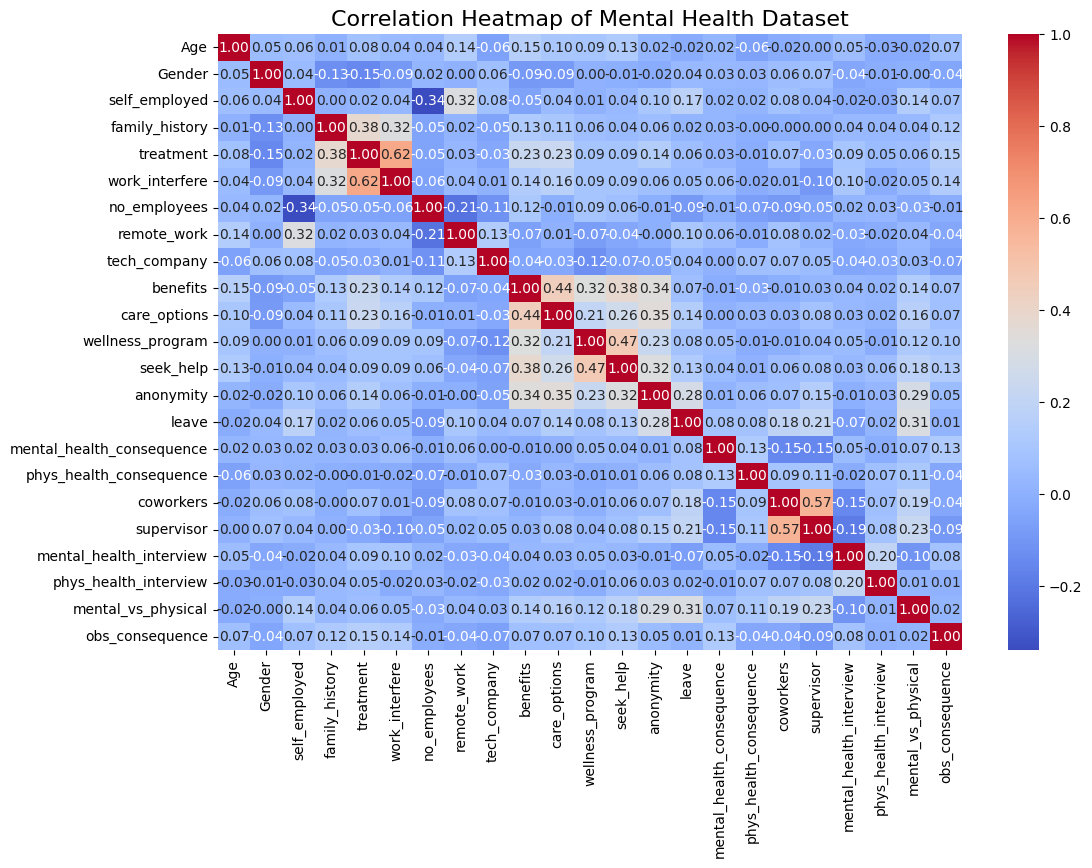

In [119]:
# Calculate the correlation matrix
corr = mental_health.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize":10})
plt.title('Correlation Heatmap of Mental Health Dataset', fontsize=16)
plt.show()

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'mental_health' is your DataFrame and 'target_column' is your target variable
y = mental_health['treatment']
X = mental_health.drop('treatment', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8167330677290837

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       117
           1       0.81      0.86      0.83       134

    accuracy                           0.82       251
   macro avg       0.82      0.81      0.81       251
weighted avg       0.82      0.82      0.82       251


Confusion Matrix:
 [[ 90  27]
 [ 19 115]]


Overall, the Random Forest Classifier achieved an accuracy of approximately 81.7% on the test set, indicating that it correctly predicted the treatment-seeking behavior for the majority of the instances.

Overall, the model performed reasonably well, with higher precision and recall for class 1 (seeking treatment) compared to class 0 (not seeking treatment), indicating that the model was better at predicting instances of seeking treatment.